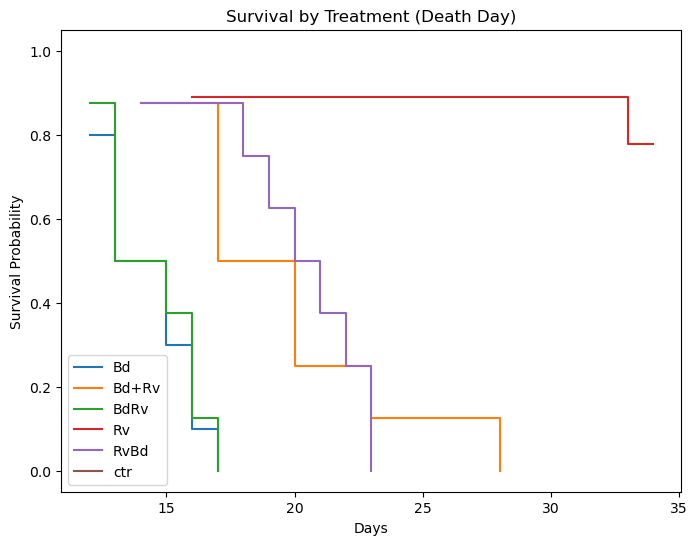

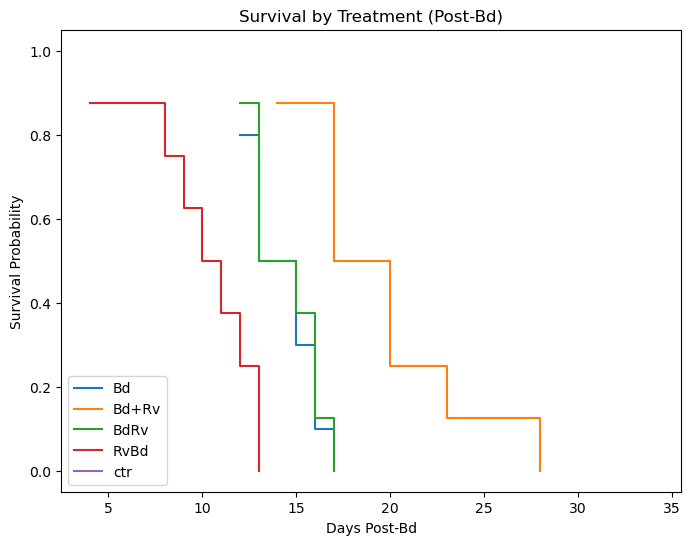

In [3]:
# Survival using scikit-survival
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sksurv.util import Surv
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.compare import compare_survival

# Load dataset
ce_perfrog = pd.read_csv("ce_perfrog.csv")

# Convert censor column for sksurv
# lifelines: censor = 1 means event occurred
# sksurv: event = True means event occurred
# Make sure: event = censor == 1
ce_perfrog["event"] = ce_perfrog["censor"] == 1

#===============================
# 1. KM survival by raw death_day
#===============================
plt.figure(figsize=(8,6))

for treatment, group in ce_perfrog.groupby("treatment"):
    df = group.dropna(subset=["death_day", "event"])
    if len(df) == 0:
        continue
        
    # Structured array survival object
    survival_data = Surv.from_dataframe("event", "death_day", df)
    
    # KM estimator
    time, survival_prob = kaplan_meier_estimator(
        df["event"].values, 
        df["death_day"].values
    )
    
    plt.step(time, survival_prob, where="post", label=treatment)

plt.title("Survival by Treatment (Death Day)")
plt.xlabel("Days")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()


#=================================
# 2. KM survival by death_post_Bd
#=================================
plt.figure(figsize=(8,6))

for treatment, group in ce_perfrog.groupby("treatment"):
    df = group.dropna(subset=["death_post_Bd", "event"])
    if len(df) == 0:
        continue
        
    # KM curve
    time, survival_prob = kaplan_meier_estimator(
        df["event"].values, 
        df["death_post_Bd"].values
    )
    
    plt.step(time, survival_prob, where="post", label=treatment)

plt.title("Survival by Treatment (Post-Bd)")
plt.xlabel("Days Post-Bd")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

